## Modeling a Single Neuron

What you're looking at is a recording of action potentials (commonly called "spikes") from a single neuron. Here's what this data represents:

1. Spike Times: Each number in the right column represents the precise time (in milliseconds) when the neuron fired an action potential.
2. Cumulative Timing: The values increase because they're showing the absolute time since recording began. For example:

    First spike occurred at 2.01 ms
    Second spike occurred at 8.45 ms
    Last recorded spike occurred around 359,978.54 ms (about 6 minutes into the recording)


3. Poisson Process with Refractory Period: As mentioned in your text, neuronal firing is typically modeled as a homogeneous Poisson process with a refractory period. This means:

    The neuron fires randomly following a Poisson distribution
    After each firing (spike), there's a brief period (~1 ms) called the refractory period during which the neuron cannot fire again

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit

sns.set(style="whitegrid")
plt.rc('text')
plt.rc('font', family='serif')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\magggien\AppData\Local\Temp\ipykernel_9296\2855878822.py:1: SyntaxWarning: invalid escape sequence '\d'
  spike_times = np.loadtxt('..\data\Data_neuron.txt')


Number of spikes: 30165
Number of intervals: 30164
Range of spike times: 2.01 to 359978.54 ms
Min interval: 1.900 ms
Max interval: 101.580 ms
Mean interval: 11.934 ms


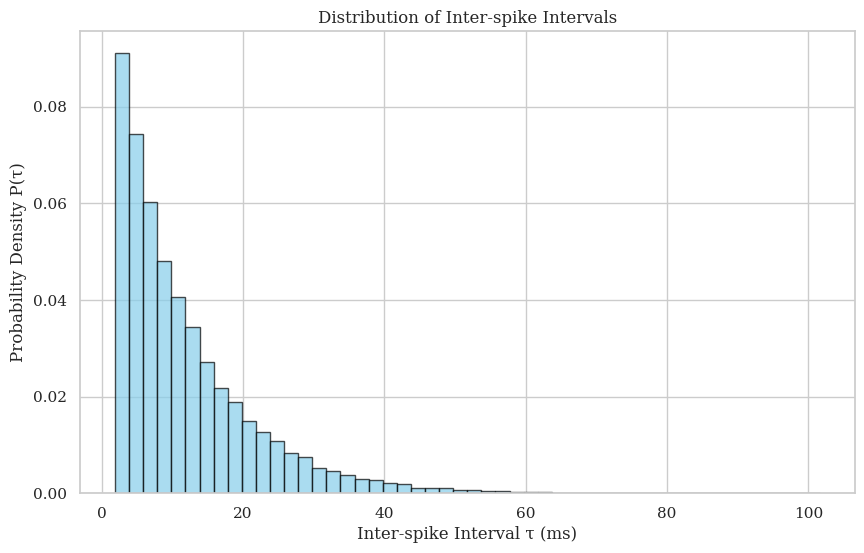

In [21]:
spike_times = np.loadtxt('..\data\Data_neuron.txt')
intervals = np.diff(spike_times)
print(f"Number of spikes: {len(spike_times)}")
print(f"Number of intervals: {len(intervals)}")
print(f"Range of spike times: {spike_times[0]} to {spike_times[-1]} ms")
print(f"Min interval: {np.min(intervals):.3f} ms")
print(f"Max interval: {np.max(intervals):.3f} ms")
print(f"Mean interval: {np.mean(intervals):.3f} ms")

# Plot the distribution of interspike intervals
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(intervals, bins=50, density=True, alpha=0.7, 
                         color='skyblue', edgecolor='black')
plt.xlabel('Inter-spike Interval τ (ms)')
plt.ylabel('Probability Density P(τ)')
plt.title('Distribution of Inter-spike Intervals')
plt.savefig('..\\results\\neuron_model\\interspike_intervals.pdf', dpi=300, bbox_inches='tight')

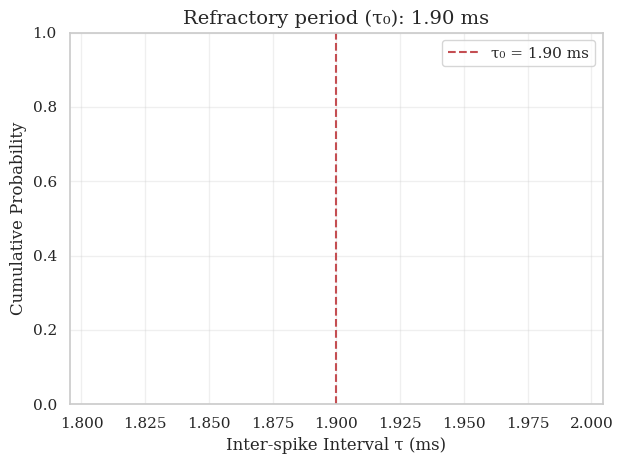

In [4]:
# Identify the minimum interval (refractory period)
tau_0 = np.min(intervals)
plt.axvline(tau_0, color='r', linestyle='--', label=f'τ₀ = {tau_0:.2f} ms')
plt.xlabel('Inter-spike Interval τ (ms)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.title(f'Refractory period (τ₀): {tau_0:.2f} ms', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('..\\results\\neuron_model\\refractory_period.pdf', dpi=300, bbox_inches='tight')
plt.show()


Fitted amplitude: 0.0999 ± 0.0003
Fitted decay rate (λ): 0.0999 ± 0.0005 ms⁻¹


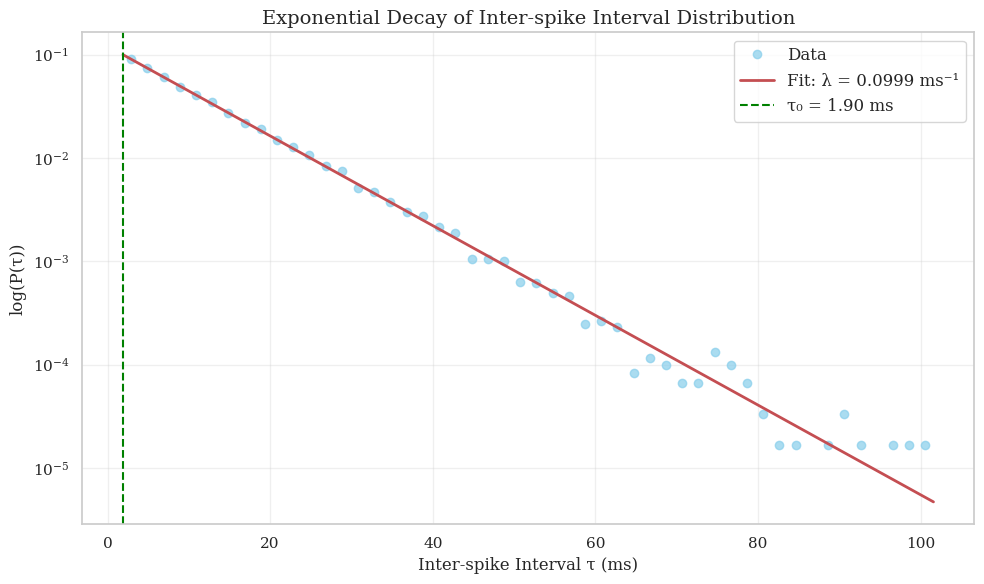

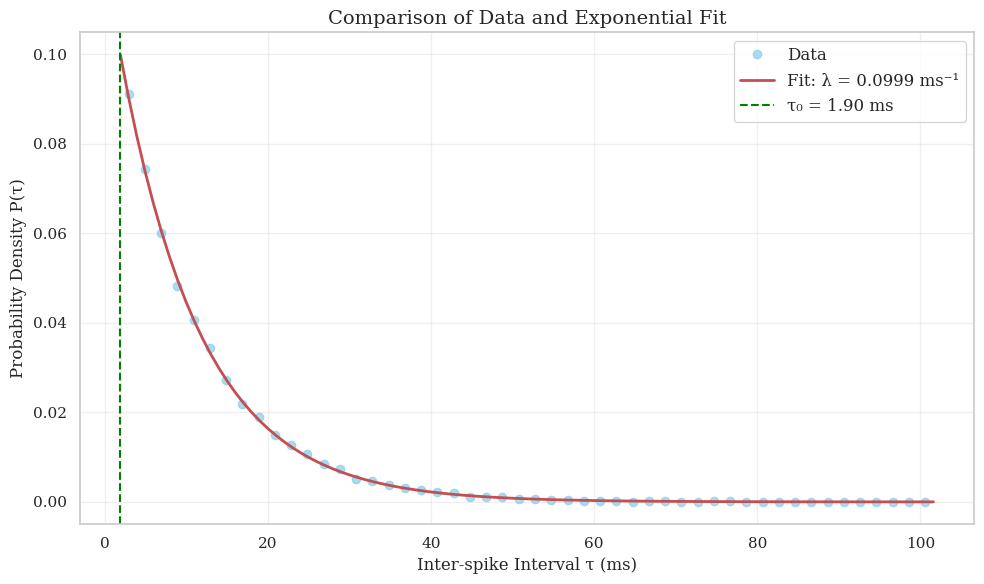

In [5]:
# Fit exponential function for τ > τ₀
def exp_func(x, a, lambda_val):
    return a * np.exp(-lambda_val * (x - tau_0)) #amplitude, tau_0 refractory period, lamba_val is the decay rate

# Get bin centers for fitting
bin_centers = (bins[:-1] + bins[1:]) / 2
valid_indices = bin_centers > tau_0
x_data = bin_centers[valid_indices]
y_data = hist[valid_indices]

# Initial guess for parameters (amplitude and decay rate)
p0 = [max(y_data), 0.1]
    
# Fit the curve
popt, pcov = curve_fit(exp_func, x_data, y_data, p0=p0)
a_fit, lambda_fit = popt
perr = np.sqrt(np.diag(pcov))  # Standard errors on parameters

print(f"Fitted amplitude: {a_fit:.4f} ± {perr[0]:.4f}")
print(f"Fitted decay rate (λ): {lambda_fit:.4f} ± {perr[1]:.4f} ms⁻¹")

# Plot the distribution and the fit on semi-log scale
plt.figure(figsize=(10, 6))
plt.semilogy(bin_centers, hist, 'o', alpha=0.7, color='skyblue', label='Data')
x_fit = np.linspace(tau_0, max(intervals), 100)
y_fit = exp_func(x_fit, a_fit, lambda_fit)
plt.semilogy(x_fit, y_fit, 'r-', linewidth=2, label=f'Fit: λ = {lambda_fit:.4f} ms⁻¹')

plt.axvline(tau_0, color='green', linestyle='--', 
            label=f'τ₀ = {tau_0:.2f} ms')
plt.xlabel('Inter-spike Interval τ (ms)', fontsize=12)
plt.ylabel('log(P(τ))', fontsize=12)
plt.title('Exponential Decay of Inter-spike Interval Distribution', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('..\\results\\neuron_model\\log_decay.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Also plot on regular scale for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, 'o', alpha=0.7, 
         color='skyblue', label='Data')
plt.plot(x_fit, y_fit, 'r-', linewidth=2,
         label=f'Fit: λ = {lambda_fit:.4f} ms⁻¹')
plt.axvline(tau_0, color='green', linestyle='--', 
            label=f'τ₀ = {tau_0:.2f} ms')
plt.xlabel('Inter-spike Interval τ (ms)', fontsize=12)
plt.ylabel('Probability Density P(τ)', fontsize=12)
plt.title('Comparison of Data and Exponential Fit', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('..\\results\\neuron_model\\decay.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
df = pd.read_csv(f'..\data\Data_neuron.txt', sep='\t', header=None, names=['spikes/ms'])
df['spikes/s'] = df['spikes/ms'] / 1000
df['spikes/min'] = df['spikes/s'] / 60
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\magggien\AppData\Local\Temp\ipykernel_9296\3080332723.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv(f'..\data\Data_neuron.txt', sep='\t', header=None, names=['spikes/ms'])


,spikes/ms,spikes/s,spikes/min
0,2.01,0.00201,0.000033
1,8.45,0.00845,0.000141
2,11.23,0.01123,0.000187
3,14.43,0.01443,0.000240
4,21.32,0.02132,0.000355
...,...,...,...
30160,359926.59,359.92659,5.998777
30161,359955.38,359.95538,5.999256
30162,359961.78,359.96178,5.999363
30163,359967.39,359.96739,5.999456


In [20]:
# Use values from your analysis
lambda_val = 0.0999  # ms^-1
tau_0 = 1.90  # ms

# Generate 1000 spike times
spike_times = [0]  # First spike at time 0

for i in range(999):  # Generate 999 more spikes
    # Generate interval from exponential distribution and add refractory period
    interval = np.random.exponential(1/lambda_val) + tau_0
    
    # Add to previous spike time to get next spike time
    next_spike = spike_times[-1] + interval
    spike_times.append(next_spike)

# Now spike_times contains 1000 simulated spike times

In [ ]:
#FROM THE DATA
total_time_period = spike_times[-1] - spike_times[0]  # Last time minus first time
average_rate = len(spike_times) / (total_time_period )  # Convert to spikes/s
# ANALYTICAL SOLUTION 
average_analytical_rate = 1 / (tau_0 + 1/lambda_val)  # Spikes/ms
average_rate, average_analytical_rate

(np.float64(0.08379712977398833), 0.08396298568679032)